# Data Analysis Task 2

## Learning Objectives

In this lesson, we will:

- "Plot simple graphs from data."
- "Plot multiple graphs in a single figure."

## Key points

- "Use the `pyplot` module from the `matplotlib` library for creating simple visualizations."

## Visualizing data
The mathematician Richard Hamming once said, "The purpose of computing is insight, not numbers,"
and the best way to develop insight is often to visualize data.  Visualization deserves an entire
lecture of its own, but we can explore a few features of Python's `matplotlib` library here.  While
there is no official plotting library, `matplotlib` is the _de facto_ standard.  First, we will
import the `pyplot` module from `matplotlib` and use two of its functions to create and display a
heat map of our data:

In [1]:
#import matplotlib.pyplot as plt
#image = plt.imshow(data)
#plt.show()

![eatmap visualization of inflammation data using Matplotlib's imshow: rows represent patients and columns represent days. Color intensity indicates inflammation levels, with a gradient from dark (low values) to bright (high values).](images/inflammation-01-imshow.svg)

Each row in the heat map corresponds to a patient in the clinical trial dataset, and each column corresponds to a day in the dataset.  Blue pixels in this heat map represent low values, while yellow pixels represent high values.  As we can see, the general number of inflammation flare-ups for the patients rises and falls over a 40-day period.

So far so good as this is in line with our knowledge of the clinical trial and Dr. Maverick's claims:

* the patients take their medication once their inflammation flare-ups begin
* it takes around 3 weeks for the medication to take effect and begin reducing flare-ups
* and flare-ups appear to drop to zero by the end of the clinical trial.

Now let's take a look at the average inflammation over time:

In [2]:
#ave_inflammation = np.mean(data, axis=0)
#ave_plot = plt.plot(ave_inflammation)
#plt.show()

![Line plot showing the average inflammation over time for multiple patients. The x-axis represents days and the y-axis shows the average inflammation level. The graph shows a rising trend that peaks and then gradually decreases, indicating a typical inflammation response pattern.](images/inflammation-01-average.svg)

Here, we have put the average inflammation per day across all patients in the variable `ave_inflammation`, then asked `matplotlib.pyplot` to create and display a line graph of those values.  The result is a reasonably linear rise and fall, in line with Dr. Maverick's claim that the medication takes 3 weeks to take effect.  But a good data scientist doesn't just consider the average of a dataset, so let's have a look at two other statistics:


In [3]:
#max_plot = plt.plot(np.max(data, axis=0))
#plt.show()

![Line plot showing the maximum inflammation level per day across all patients. The x-axis represents days and the y-axis shows the maximum inflammation value observed. The curve rises sharply to a peak around the midpoint and then declines, indicating when the most severe inflammation occurred.](images/inflammation-01-maximum.svg)

In [4]:
#min_plot = plt.plot(np.min(data, axis=0))
#plt.show()

![Line plot showing the minimum inflammation level per day across all patients. The x-axis represents days and the y-axis shows the minimum recorded inflammation value. The plot remains relatively flat, indicating that at least one patient consistently experienced very low or zero inflammation throughout the period.](images/inflammation-01-minimum.svg)

The maximum value rises and falls linearly, while the minimum seems to be a step function. Neither trend seems particularly likely, so either there's a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the numbers themselves without visualization tools.

### Grouping plots
You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function `matplotlib.pyplot.figure()` creates a space into which we will place all of our plots. The parameter `figsize` tells Python how big to make this space. Each subplot is placed into the figure using its `add_subplot` method. The `add_subplot` method takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). Each subplot is stored in a
different variable (`axes1`, `axes2`, `axes3`). Once a subplot is created, the axes can be titled using the `set_xlabel()` command (or `set_ylabel()`). Here are our three plots side by side:

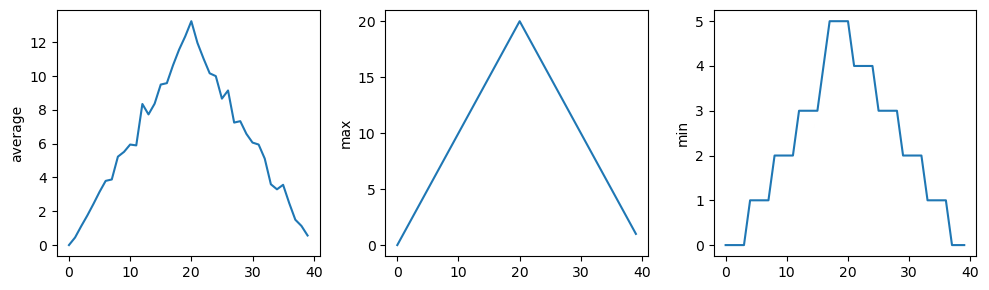

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0))

fig.tight_layout()

plt.savefig('inflammation.png')
plt.show()

![Grouped line plots showing average, maximum, and minimum inflammation levels over time across patients. Each subplot shares the same x-axis representing days, while the y-axes show inflammation values. The average plot peaks mid-way, the maximum plot shows sharp rises and falls, and the minimum plot remains mostly flat, highlighting patterns in patient inflammation data.](images/inflammation-01-group-plot.svg)

The call to `loadtxt` reads our data, and the rest of the program tells the plotting library how large we want the figure to be, that we're creating three subplots, what to draw for each one, and that we want a tight layout. (If we leave out that call to `fig.tight_layout()`, the graphs will actually be squeezed together more closely.)

The call to `savefig` stores the plot as a graphics file. This can be a convenient way to store your plots for use in other documents, web pages etc. The graphics format is automatically determined by Matplotlib from the file name ending we specify; here PNG from 'inflammation.png'. Matplotlib supports many different graphics formats, including SVG, PDF, and JPEG.

## Importing libraries with shortcuts

In this lesson we use the `import matplotlib.pyplot` syntax to import the `pyplot` module of `matplotlib`. However, shortcuts such as `import matplotlib.pyplot as plt` are frequently used. Importing `pyplot` this way means that after the initial import, rather than writing `matplotlib.pyplot.plot(...)`, you can now write `plt.plot(...)`. Another common convention is to use the shortcut `import numpy as np` when importing the NumPy library. We then can write `np.loadtxt(...)` instead of `np.loadtxt(...)`, for example.

Some people prefer these shortcuts as it is quicker to type and results in shorter lines of code - especially for libraries with long names! You will frequently see Python code online using a `pyplot` function with `plt`, or a NumPy function with `np`, and it's because they've used this shortcut. It makes no difference which approach you choose to take, but you must be consistent as if you use `import matplotlib.pyplot as plt` then `matplotlib.pyplot.plot(...)` will not work, and you must use `plt.plot(...)` instead. Because of this, when working with other people it is important you agree on how libraries are imported.

## Plot Scaling
Why do all of our plots stop just short of the upper end of our graph?

```{admonition} Solution
:class: dropdown
Because matplotlib normally sets x and y axes limits to the min and max of our data (depending on data range)
```

If we want to change this, we can use the `set_ylim(min, max)` method of each 'axes', for example:

In [6]:
axes3.set_ylim(0,6)

(0.0, 6.0)

Update your plotting code to automatically set a more appropriate scale. (Hint: you can make use of the `max` and `min` methods to help.)

```{admonition} Solution
:class: dropdown
```python 
axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0))
axes3.set_ylim(0,6)

# A more automated approach
min_data = np.min(data, axis=0)
axes3.set_ylabel('min')
axes3.plot(min_data)
axes3.set_ylim(np.min(min_data), np.max(min_data) * 1.1)


```
```

## Drawing Straight Lines
In the center and right subplots above, we expect all lines to look like step functions because non-integer value are not realistic for the minimum and maximum values. However, you can see that the lines are not always vertical or horizontal, and in particular the step function in the subplot on the right looks slanted. Why is this?

```{admonition} Solution
:class: dropdown
Because matplotlib interpolates (draws a straight line) between the points. One way to do avoid this is to use the Matplotlib `drawstyle` option:
```

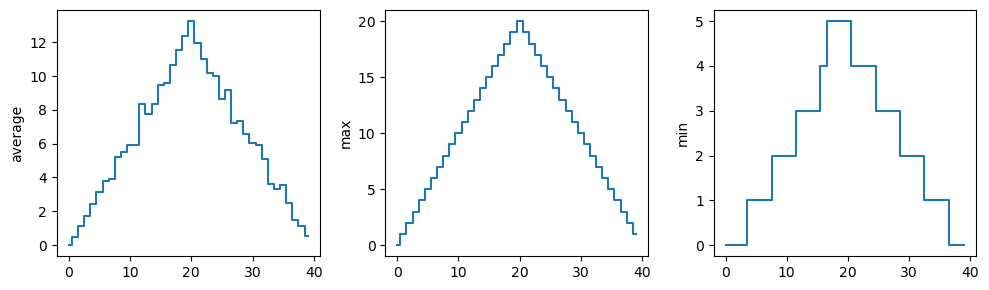

In [7]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)
axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0), drawstyle='steps-mid')
axes2.set_ylabel('max')
axes2.plot(np.max(data, axis=0), drawstyle='steps-mid')
axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0), drawstyle='steps-mid')
fig.tight_layout()
plt.show()

![Line plot comparing average, maximum, and minimum inflammation levels over time using different line styles. The average is shown with a solid line, the maximum with a dashed line, and the minimum with a dotted line. The x-axis represents days, and the y-axis shows inflammation values.](images/inflammation-01-line-styles.svg)

## Make Your Own Plot
Create a plot showing the standard deviation (`np.std`) of the inflammation data for each day across all patients.


```{admonition} Solution
:class: dropdown
```python
std_plot = plt.plot(np.std(data, axis=0))
plt.show()
```
```

## Moving Plots Around
Modify the program to display the three plots on top of one another instead of side by side.

```{admonition} Solution
:class: dropdown
```python
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
# change figsize (swap width and height)
fig = plt.figure(figsize=(3.0, 10.0))
# change add_subplot (swap first two parameters)
axes1 = fig.add_subplot(3, 1, 1)
axes2 = fig.add_subplot(3, 1, 2)
axes3 = fig.add_subplot(3, 1, 3)
axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))
axes2.set_ylabel('max')
axes2.plot(np.max(data, axis=0))
axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0))
fig.tight_layout()
plt.show()
```
```